# Multiple Linear Regression


### Multiple Predictors and single target
1. y ~ x1, x2, x3,.....,xn
2. $ y_pred = B0 + B1*x1 + B2 *x2 + B3*x3....+Bn*xn 

In [ ]:
# Ignore non harmful warnings 
from warnings import filterwarnings

filterwarnings("ignore")

## Step 1 : Data Ingestion :- Read the dara using pandas dataframe 

In [2]:
import pandas as pd

df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# PROFIT ~ RND, ADMIN, MKT
$ PROFIT_Pred = B0 + B1 * RND + B2*ADMIN +B3*MKT


# Step 2 :- Perform Basic Data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

## Step 3 :- Visualize the data

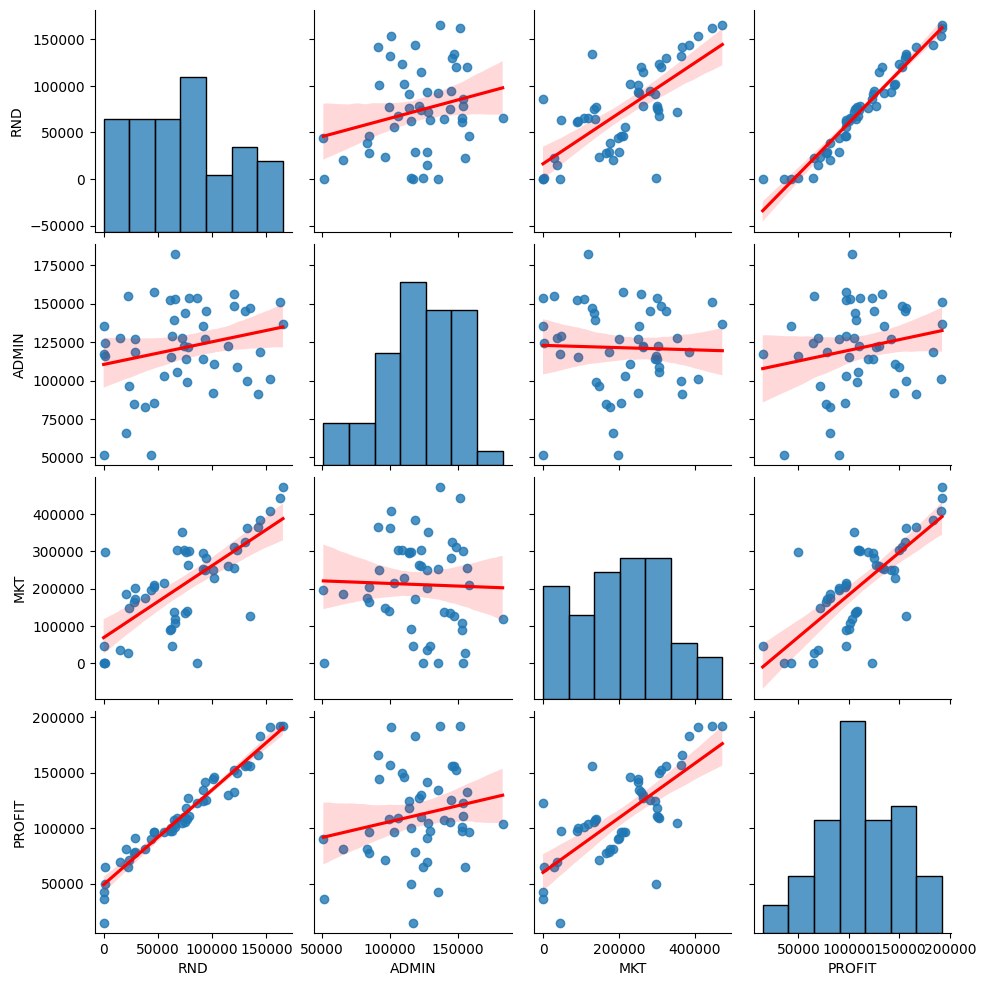

In [10]:
import seaborn as sns

sns.pairplot(df, kind="reg", plot_kws={"line_kws": {"color": "red"}})

# Step 4 :- Seperate X & Y(PROFIT)

In [11]:
X = df.drop(columns=["PROFIT", "STATE"])
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [12]:
Y = df[["PROFIT"]]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 5 :- Build linear regression model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [16]:
model.intercept_

array([50122.19298987])

In [19]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [20]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [22]:
coefs = pd.Series(model.coef_.flatten(), index=X.columns)

<Axes: >

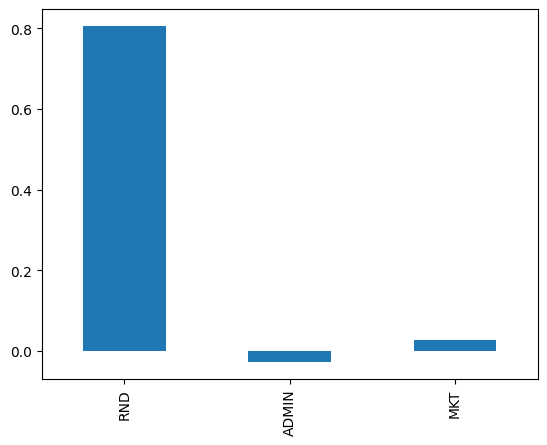

In [25]:
coefs.plot(kind="bar")

### Fitted Equation
$ Profitpred = 50122.19 + 0.8057 - 0.0268*ADMIN + 0.027*MKT $

### Following Conclusions
1. If RND Increases by 1 unit profit will increase 0.8057
2. If ADMIN Increases by 1 unit profit will decreases by 0.0268
3. If MKT Increases by 1 unit profit will increae by 0.0272 

    ### For increasing Profit RND budget is more important compared to other 

### Step 6 :- Model Evaluation

In [26]:
model.score(X, Y)

0.9507459940683246

In [32]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [33]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [27]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)

In [28]:
def evaluate_model(model, x, y):
    # Predict the result on x
    ypred = model.predict(x)

    # Calculate different metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    # Print the metrics
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [29]:
evaluate_model(model, X, Y)

RMSE : 8855.34
MAE : 6471.45
MAPE : 10.60%
R2 : 95.07%


### R2 Score >= 0.8 hence above model is a good model

### Step 8 :- Out Of Sample Prediction

In [34]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [35]:
X.values

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [37]:
rnd = 2_00_000
admin = 50_000
mkt = 1_00_000

xnew = [[rnd, admin, mkt]]

profit_pred = model.predict(xnew)
profit_pred

d:\machine learnings\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[212647.21103336]])

In [36]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
